## FixRight Services Project

In [1]:
# Load the dataset
import pandas as pd

df = pd.read_excel("01JTE7AA8FFKNCCTFYYR44ZRJZ.xlsx")
df.head()

,date,customer_id,channel,season,service_category,ad_spend,repeat_visit,job_revenue
0,2024-06-14,8e9a3da4-4ed4-44e6-bbdc-e3eef37cc04d,In-store,Summer,Electrical,79.47,False,527.41
1,2025-03-18,9855e852-3f7f-458b-8b06-0b37d537bb1a,In-store,Spring,Cleaning,78.88,False,101.50
2,2024-06-13,71e764ad-e542-4b8f-8ad5-af72ada0fbf9,Instagram,Summer,HVAC,104.27,False,489.77
3,2025-04-16,54984a23-2df1-4f78-8e30-0189b6850c8b,Referral,Spring,Cleaning,53.38,False,305.88
4,2025-01-22,7a361e0a-4043-4848-b840-02cf2088056f,Instagram,Winter,Plumbing,96.52,False,182.45


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2000 non-null   datetime64[ns]
 1   customer_id       2000 non-null   object        
 2   channel           2000 non-null   object        
 3   season            2000 non-null   object        
 4   service_category  2000 non-null   object        
 5   ad_spend          2000 non-null   float64       
 6   repeat_visit      2000 non-null   bool          
 7   job_revenue       2000 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), object(4)
memory usage: 111.5+ KB


* No missing values in the dataset.

In [3]:
df.describe()

,date,ad_spend,job_revenue
count,2000,2000.000000,2000.000000
mean,2024-10-30 17:35:31.200000,67.579255,438.390615
min,2024-05-02 00:00:00,15.000000,82.260000
25%,2024-07-29 00:00:00,42.815000,254.742500
50%,2024-10-30 00:00:00,67.115000,427.515000
75%,2025-02-01 00:00:00,94.500000,630.252500
max,2025-05-02 00:00:00,119.990000,799.050000
std,NaN,30.062985,209.774586


In [5]:
df.shape

(2000, 8)

In [6]:
df.nunique()

date                 363
customer_id         2000
channel                5
season                 4
service_category       4
ad_spend            1819
repeat_visit           2
job_revenue         1965
dtype: int64

Text(0.5, 1.0, 'Service Categories')

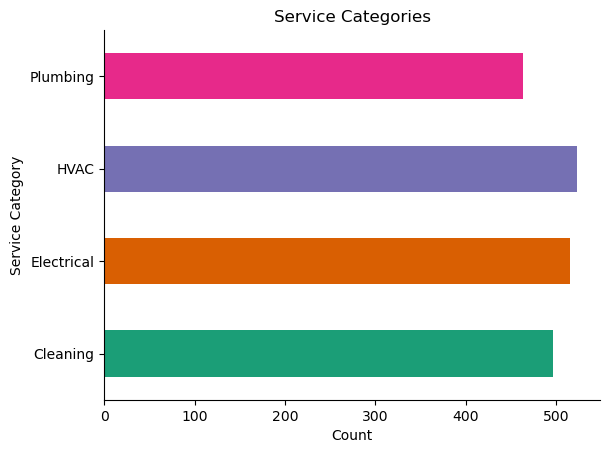

In [86]:
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

df.groupby('service_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Count")
plt.ylabel("Service Category")
plt.title("Service Categories")

In [17]:
df.service_category.value_counts()


service_category
HVAC          523
Electrical    516
Cleaning      497
Plumbing      464
Name: count, dtype: int64

In [59]:
df_one_time_usage = df[~df["repeat_visit"]]

df_one_time_usage.groupby("service_category").size().sort_values(ascending=False)

service_category
HVAC          274
Electrical    256
Cleaning      254
Plumbing      240
dtype: int64

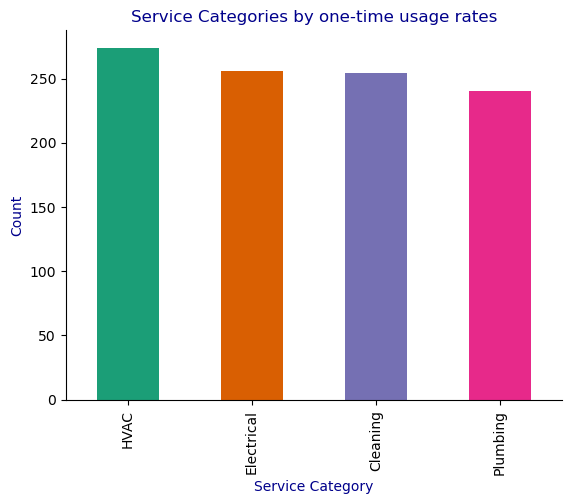

In [83]:
df_one_time_usage.groupby('service_category').size().sort_values(ascending=False).plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Service Category").set_color("darkblue")
plt.ylabel("Count").set_color("darkblue")
plt.title("Service Categories by one-time usage rates").set_color("darkblue")

* From the previous analysis, it is found that **HVAC** has the highest one-time usage rate followed by **Electrical**.

In [85]:
df_recurring_clients = df[df["repeat_visit"]]

df_recurring_clients.groupby("channel").size().sort_values(ascending=False)

channel
Referral      215
In-store      202
Facebook      196
Instagram     192
Google Ads    171
dtype: int64

* Through tracking channel effectiveness in attracting recurring clients, **Referral** has highest effect while **Google Ads** has the lowest.
* Ordering channels by effectiveness in attracting recurring clients from highest to lowest:
    * **Referral**
    * **In-store**
    * **Facebook**
    * **Instagram**
    * **Google Ads**

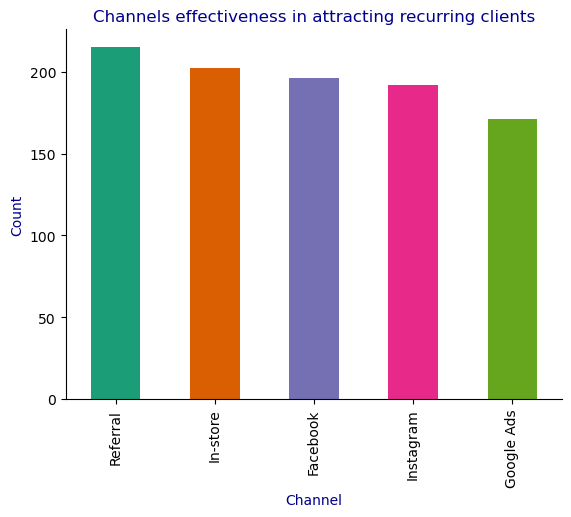

In [84]:
df_recurring_clients.groupby('channel').size().sort_values(ascending=False).plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Channel").set_color("darkblue")
plt.ylabel("Count").set_color("darkblue")
plt.title("Channels effectiveness in attracting recurring clients").set_color("darkblue")

In [91]:
pip install yagmail

Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install keyring

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import yagmail

yagmail.register("my@gmail.com", "mypassword")

yag = yagmail.SMTP('eng.rana.elsayed@gmail.com')
yag.send('eng.rana.elsayed@gmail.com', subject = 'Maintenance Reminder', contents = 'Maintenance Reminder')

{}